In [1]:
%matplotlib inline


LeNet-5: An Introduction
===============

The most famous of Convolutional Neural Network (CNN) is the LeNet-5 model, proposed in the following paper. 

- LeCun, Bottou, Bengio, Haffner (1998), Gradient-based learning applied to document recognition, Proceedings of the IEEE [[link]](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf). 


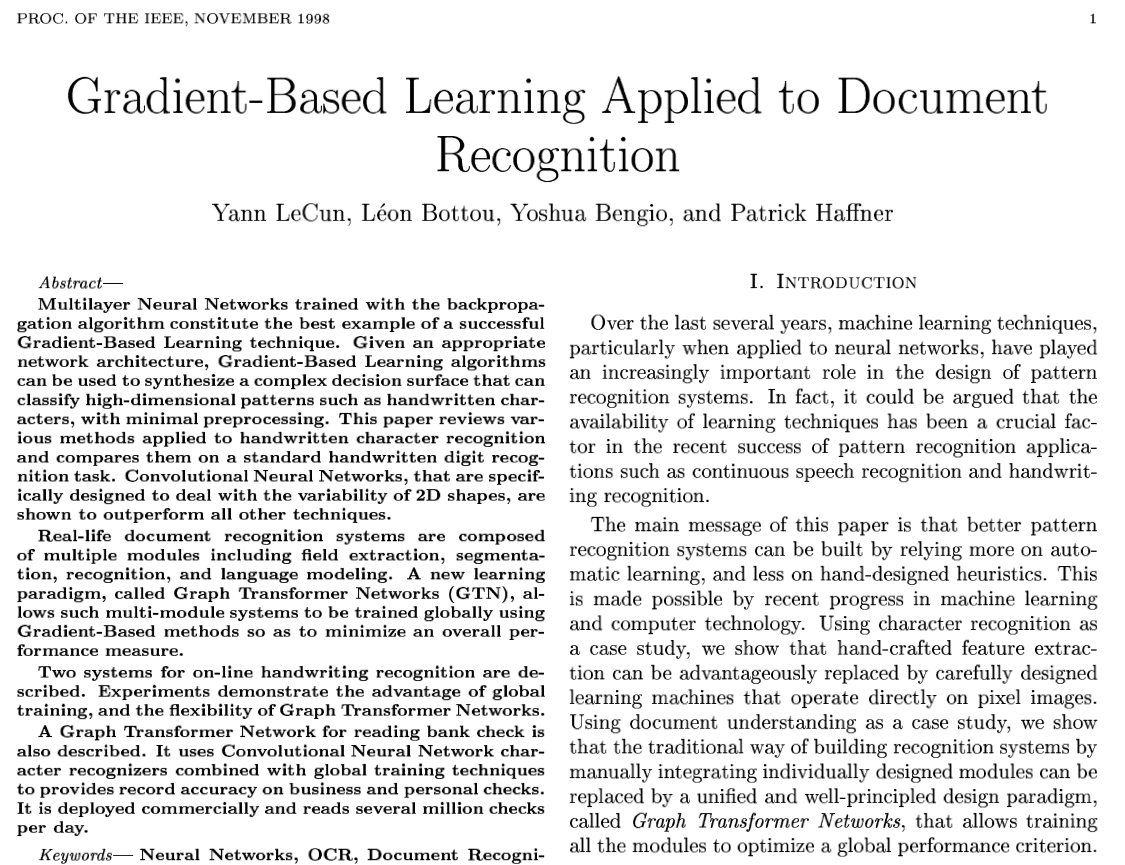

In [2]:
from IPython.display import Image
Image(filename='graphics/LeCun98.png')

## The architecture of LeNet-5

It is a simple feed-forward network. It takes the input, feeds it
through several layers one after the other, and then finally gives the
output. The architecture of LeNet-5 is illustrated in the following.

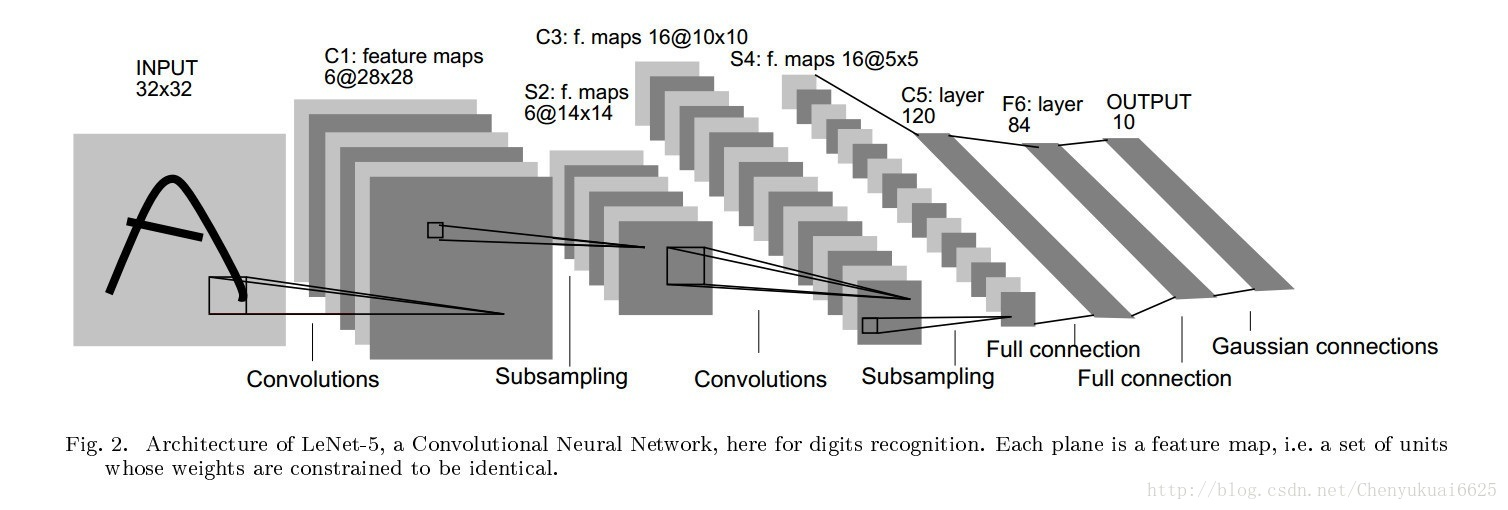

In [3]:
Image(filename='./graphics/LeNet.jpg') # <img src="./graphics/LeNet.jpg" alt="drawing" width="1000"/>

> Input: 28-by-28 or 32-by-32 gray images, e.g. MNIST

> Layer1：1) a 2D Convolution with kernel size: Height = 5, Width = 5, Depth = 1, in_channels=1, out_channels = 6, Padding = 2 (for 28x28 input) or 0 (for 32x32 input); 2) Activation = ReLU. Output size = [28, 28, 6].

> Layer2：Max Pooling of size [2,2], Output size = [14,14,6]. 

> Layer3：1) 2D convolution with kernel size: height = 5, width = 5, depth = 1, in_channels=6, out_channels=16; 2) ReLU activation. Output size = [10,10,16].

> Layer4：Max Pooling of size [2,2], Output size = [5,5,16]. 

> Layer5：fully connected layer 1 with input size 5*5*16=400, and output size 120; fully connected layer 2 of input size 120 and output size 84; fully connected layer 3 of input size 84 and output size 10 (for 10 classes in MNIST classification).

### Conv2D
The following picture illustrate the 2-D convolutional operator:

<img src="./graphics/convgif.gif" alt="drawing" width="400"/>

#### Shape change after convolutions

- Input: $(N, C_{in}, H_{in}, W_{in})$
- Output: $(N, C_{out}, H_{out}, W_{out})$ where

$$H_{out} = \left\lfloor\frac{H_{in} + 2 \times \text{padding}[1] - \text{dilation}[1]
      \times (\text{kernel_size}[1] - 1) - 1}{\text{stride}[1]} + 1\right\rfloor$$
      
$$W_{out} = \left\lfloor\frac{W_{in} + 2 \times \text{padding}[2] - \text{dilation}[2]
      \times (\text{kernel_size}[2] - 1) - 1}{\text{stride}[2]} + 1\right\rfloor$$
      
For example, a gray image of size 28x28 passing through a conv2d(in_channels=1,out_channels=6,kernel_size=5,padding=2) becomes 
$$ H_{out}=W_{out} = \frac{28+2*2-1*(5-1)-1}{1} +1= 28 $$


### ReLU

Recified Linear Unit (ReLU) for activation function:

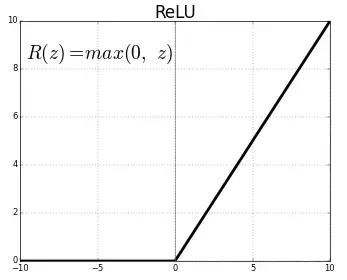

In [4]:
Image(filename='graphics/relu.jpg') # <img src="./graphics/relu.jpg" alt="drawing" width="600"/>

### MaxPooling2D

A max-pooling operator MaxPool2d(2,stride=2):

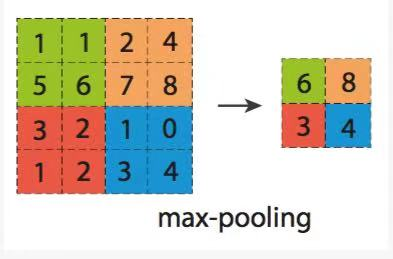

In [5]:
Image(filename='graphics/pooling.jpg') #<img src="./graphics/pooling.jpg" alt="drawing" width="400"/>

For example, an input of size 28x28x6 passing through a MaxPool2d(2,stride=2) becomes 14x14x6. 

Define the network
------------------

Neural networks can be constructed using the ``torch.nn`` package.

An ``nn.Module`` contains layers, and a method ``forward(input)``\ that
returns the ``output``.

Let’s define this network:

In [6]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install torchsummary

In [7]:
from torch.nn import Module
from torch import nn

class LeNet5(Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=[5,5], padding=2) 
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, stride=2)
        self.fc1 = nn.Linear(16*5*5, 120)   # self.fc1 = nn.Linear(256, 120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        y = self.conv1(x)
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.relu2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0], -1) # y = y.view(-1, 16 * 5 * 5)   #  #  
        y = self.fc1(y)
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.relu4(y)
        y = self.fc3(y)
        return y

net = LeNet5()
print(net)

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=[5, 5], stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (relu4): ReLU()
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [8]:
# show torchsummary of the model
#import os
#import torch
from torchsummary import summary

#os.environ["CUDA_VISIBLE_DEVICES"] = "1"
#use_gpu = torch.cuda.is_available()
#device = torch.device("cuda" if use_gpu else "cpu")
#print(device)

summary(net, input_size=(1,28,28), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              ReLU-2            [-1, 6, 28, 28]               0
         MaxPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              ReLU-5           [-1, 16, 10, 10]               0
         MaxPool2d-6             [-1, 16, 5, 5]               0
            Linear-7                  [-1, 120]          48,120
              ReLU-8                  [-1, 120]               0
            Linear-9                   [-1, 84]          10,164
             ReLU-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/ba

You just have to define the ``forward`` function, and the ``backward``
function (where gradients are computed) is automatically defined for you
using ``autograd``.
You can use any of the Tensor operations in the ``forward`` function.

The learnable parameters of a model are returned by ``net.parameters()``



In [9]:
# Print the number of parameters
number_params = sum(p.numel() for p in net.parameters() if p.requires_grad)

print(f'total parameters: {number_params}')

#params = list(net.parameters())
#print(len(params))
#print(params[0].size())  # conv1's .weight

total parameters: 61706


### Load the dataset

In [10]:
import numpy as np
import torch
import torchvision
from torchvision.datasets import mnist
from torch.nn import CrossEntropyLoss
from torch.optim import SGD, Adam
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

mytransform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.1307,), (0.3081,))
     ])

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data/MNIST_data', train=True, download=True,
                             transform=mytransform), 
                             batch_size=200, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data/MNIST_data', train=False, download=True,
                             transform=mytransform), 
                             batch_size=1000, shuffle=False)


Extracting ./data/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST_data/MNIST/raw


Extracting ./data/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST_data/MNIST/raw


Extracting ./data/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST_data/MNIST/raw


Extracting ./data/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST_data/MNIST/raw
Processing...
Done!


Now let's take a look at some examples. We'll use the test_loader for this.

In [11]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

example_data.shape

torch.Size([1000, 1, 28, 28])

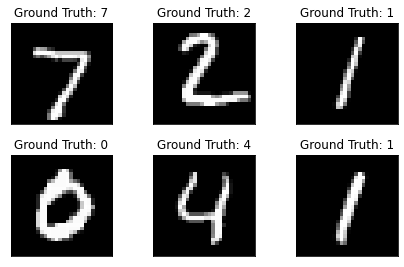

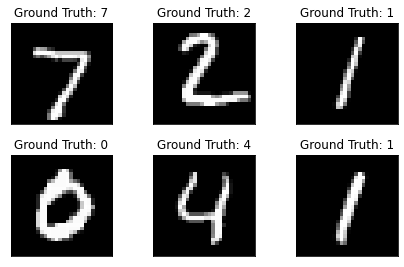

In [12]:
import matplotlib.pyplot as plt

# functions to show an image

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

### Train the network by SGD (Adam). Note: zero the gradient buffers of all parameters and backprops with random gradients:

A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or
  weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule:
  ``weight = weight - learning_rate * gradient``

In [13]:
learning_rate = 1e-2
momentum = 0.5
epoch = 10

optimizer = SGD(net.parameters(), lr=learning_rate, momentum=momentum)  # SGD 
#optimizer = Adam(net.parameters(), lr=1e-2)  #Adam
criterion = CrossEntropyLoss()      #Cross Entropy Loss


# Train the network 
for _epoch in range(epoch):
    for idx, (train_x, train_label) in enumerate(train_loader):
        label_np = np.zeros((train_label.shape[0], 10))
        optimizer.zero_grad()
        predict_y = net(train_x.float())
        _loss = criterion(predict_y, train_label.long())
        if idx % 100 == 0:
            print('idx: {}, loss: {}'.format(idx, _loss))
        _loss.backward()
        optimizer.step()

    correct = 0
    _sum = 0

    for idx, (test_x, test_label) in enumerate(test_loader):
        predict_y = net(test_x.float()).detach()
        predict_ys = np.argmax(predict_y, axis=-1)
        label_np = test_label.numpy()
        _ = predict_ys == test_label
        correct += np.sum(_.numpy(), axis=-1)
        _sum += _.shape[0]

    print('epoch: {}, accuracy: {:.2f}'.format(_epoch,correct / _sum))
    #torch.save(model, 'models/mnist_{:.2f}.pkl'.format(correct / _sum))

idx: 0, loss: 2.306323528289795
idx: 100, loss: 2.1714046001434326
idx: 200, loss: 0.6160586476325989
epoch: 0, accuracy: 0.89
idx: 0, loss: 0.4129136800765991
idx: 100, loss: 0.32181480526924133
idx: 200, loss: 0.26509416103363037
epoch: 1, accuracy: 0.94
idx: 0, loss: 0.2092176377773285
idx: 100, loss: 0.13686907291412354
idx: 200, loss: 0.2157670557498932
epoch: 2, accuracy: 0.96
idx: 0, loss: 0.14154012501239777
idx: 100, loss: 0.19090536236763
idx: 200, loss: 0.13395586609840393
epoch: 3, accuracy: 0.97
idx: 0, loss: 0.15232031047344208
idx: 100, loss: 0.15583787858486176
idx: 200, loss: 0.06990773975849152
epoch: 4, accuracy: 0.97
idx: 0, loss: 0.06936246901750565
idx: 100, loss: 0.1304837167263031
idx: 200, loss: 0.048432182520627975
epoch: 5, accuracy: 0.98
idx: 0, loss: 0.05732225254178047
idx: 100, loss: 0.06625740230083466
idx: 200, loss: 0.12182048708200455
epoch: 6, accuracy: 0.98
idx: 0, loss: 0.09001503884792328
idx: 100, loss: 0.08626928925514221
idx: 200, loss: 0.08913

### Train another network by Adam, which is faster than SGD above.

In [14]:
net1 = LeNet5()
print(net1)
summary(net1, input_size=(1,28,28), device="cpu")

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=[5, 5], stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (relu4): ReLU()
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              ReLU-2            [-1, 6, 28, 28]               0
         MaxPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              ReLU-5           [-1, 16, 10,

In [15]:
learning_rate = 1e-3
momentum = 0.5
epoch = 5

#optimizer = SGD(net.parameters(), lr=learning_rate, momentum=momentum)  # SGD 
optimizer = Adam(net1.parameters(), lr=learning_rate)  #Adam
criterion = CrossEntropyLoss()      #Cross Entropy Loss


# Train the network 
for _epoch in range(epoch):
    for idx, (train_x, train_label) in enumerate(train_loader):
        label_np = np.zeros((train_label.shape[0], 10))
        optimizer.zero_grad()
        predict_y = net1(train_x.float())
        _loss = criterion(predict_y, train_label.long())
        if idx % 100 == 0:
            print('idx: {}, loss: {}'.format(idx, _loss))
        _loss.backward()
        optimizer.step()

    correct = 0
    _sum = 0

    for idx, (test_x, test_label) in enumerate(test_loader):
        predict_y = net1(test_x.float()).detach()
        predict_ys = np.argmax(predict_y, axis=-1)
        label_np = test_label.numpy()
        _ = predict_ys == test_label
        correct += np.sum(_.numpy(), axis=-1)
        _sum += _.shape[0]

    print('epoch: {}, accuracy: {:.2f}'.format(_epoch,correct / _sum))
    #torch.save(model, 'models/mnist_{:.2f}.pkl'.format(correct / _sum))

idx: 0, loss: 2.311249256134033
idx: 100, loss: 0.38627076148986816
idx: 200, loss: 0.10587044805288315
epoch: 0, accuracy: 0.97
idx: 0, loss: 0.15084987878799438
idx: 100, loss: 0.04998862370848656
idx: 200, loss: 0.07913023233413696
epoch: 1, accuracy: 0.98
idx: 0, loss: 0.07069197297096252
idx: 100, loss: 0.14402607083320618
idx: 200, loss: 0.06910517811775208
epoch: 2, accuracy: 0.99
idx: 0, loss: 0.039576366543769836
idx: 100, loss: 0.0371929369866848
idx: 200, loss: 0.06003311276435852
epoch: 3, accuracy: 0.99
idx: 0, loss: 0.038059934973716736
idx: 100, loss: 0.02483651600778103
idx: 200, loss: 0.05079692229628563
epoch: 4, accuracy: 0.99
